<h2><center>Прогнозирование автомобиля домашняя работа</center></h2>

In [1]:
#импорт необходимых библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
import warnings
warnings.filterwarnings('ignore')

<h3>Чтение данных из набора данных:</h3>

In [2]:
#Считывание данных
dataset = pd.read_csv('car_price.csv')
dataset.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
#Отображение строки и столбца данных
dataset.shape

(205, 26)

In [4]:
#отображение информации о наборе данных
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
#Описание данных
dataset.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [6]:
# Индексный столбец - это незначимый столбец
dropColumn = dataset.drop(['car_ID'], axis=1)

<h3>Анализ первичных данных приведен ниже:</h3>
<p>мы используем график подсчета, чтобы показать количество наблюдений в каждой категориальной ячейке, используя столбцы для наших разных столбцов</p>

<AxesSubplot:xlabel='symboling', ylabel='count'>

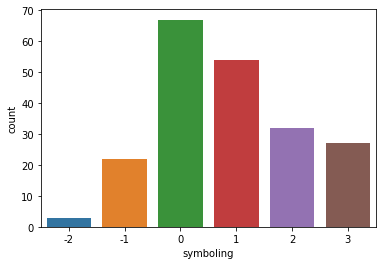

In [7]:
#мы используем countplot, чтобы показать количество наблюдений в каждой категориальной ячейке с помощью столбцов
sns.countplot('symboling', data=dataset)

<AxesSubplot:xlabel='fueltype', ylabel='count'>

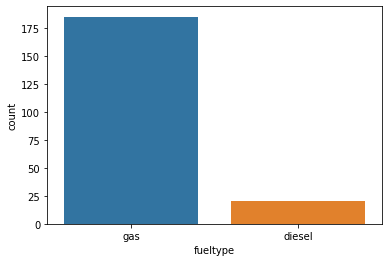

In [8]:
sns.countplot('fueltype', data=dataset)

<AxesSubplot:xlabel='aspiration', ylabel='count'>

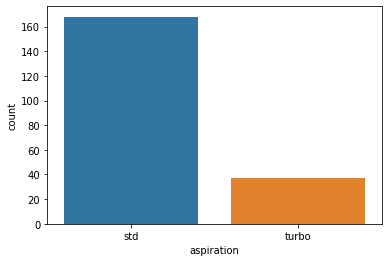

In [9]:
sns.countplot('aspiration', data=dataset)

<AxesSubplot:xlabel='doornumber', ylabel='count'>

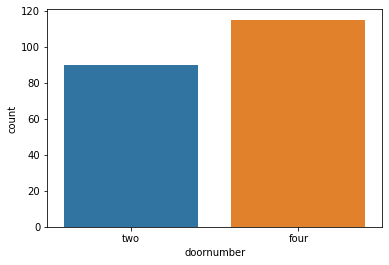

In [10]:
sns.countplot('doornumber', data=dataset)

<p>Distplot представляет одномерное распределение данных, и мы используем этот график для сравнения двух столбцов нашего набора данных.</p>

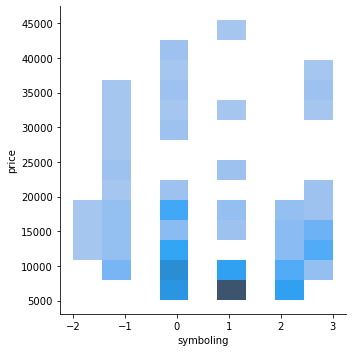

In [11]:
sns.displot(x = 'symboling', y = 'price', data=dataset)

In [12]:
#Мы создаем новую колонку под названием "Автомобильные компании" и отделяем ее от столбцов с названием автомобиля.
dataset['car_companies'] = dataset['CarName'].apply(lambda x:x.split(' ')[0])

<p>Исследуем столбцы, которые нам нужны ниже :</p>

In [13]:
dataset['car_companies'].value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: car_companies, dtype: int64

In [14]:
dataset['fueltype'].value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

In [15]:
dataset['aspiration'].value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [16]:
dataset['doornumber'].value_counts()

four    115
two      90
Name: doornumber, dtype: int64

In [17]:
#Изменение значений нашего столбца на числа
def number_(x):
    return x.map({'four':4, 'two': 2})
    
dataset['doornumber'] = dataset[['doornumber']].apply(number_)
dataset[['doornumber']].head()

,doornumber
0,2
1,2
2,2
3,4
4,4


<AxesSubplot:xlabel='wheelbase', ylabel='Density'>

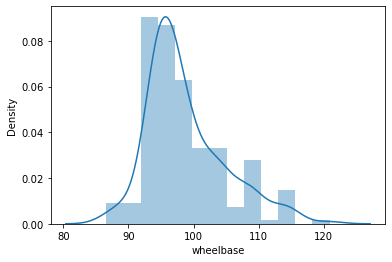

In [18]:
sns.distplot(dataset['wheelbase'])

In [19]:
#Проверка нулевого значения в нашем наборе данных :
checkEmptyValue = dataset.isnull()
if checkEmptyValue.empty:
    print("У нас есть пустое значение в наборе данных")
else:
    print("Нет, у нас нет пустого значения в наборе данных")

Нет, у нас нет пустого значения в наборе данных


In [20]:
#Для обобщения данных мы будем использовать метод Crosstab
pd.crosstab(dataset['price'], dataset['citympg']).style.background_gradient()

citympg,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,45,47,49
price,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5118.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
5151.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5195.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5348.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5389.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5399.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5499.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
5572.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0
6095.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:xlabel='price', ylabel='citympg'>

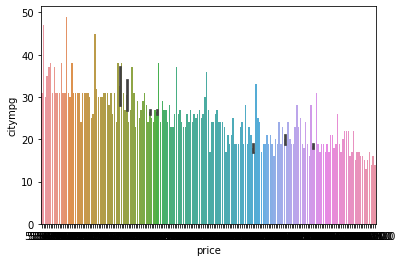

In [21]:
sns.barplot('price','citympg', data=dataset)

<h3>Визуализация данных:</h3>
<p>Парный график используется для понимания наилучшего набора признаков, чтобы объяснить взаимосвязь между двумя переменными или сформировать наиболее разделенные кластеры. Это также помогает сформировать некоторые простые модели классификации, нарисовав несколько простых линий или сделав линейное разделение в нашем наборе данных.</p>

<Figure size 2160x2160 with 0 Axes>

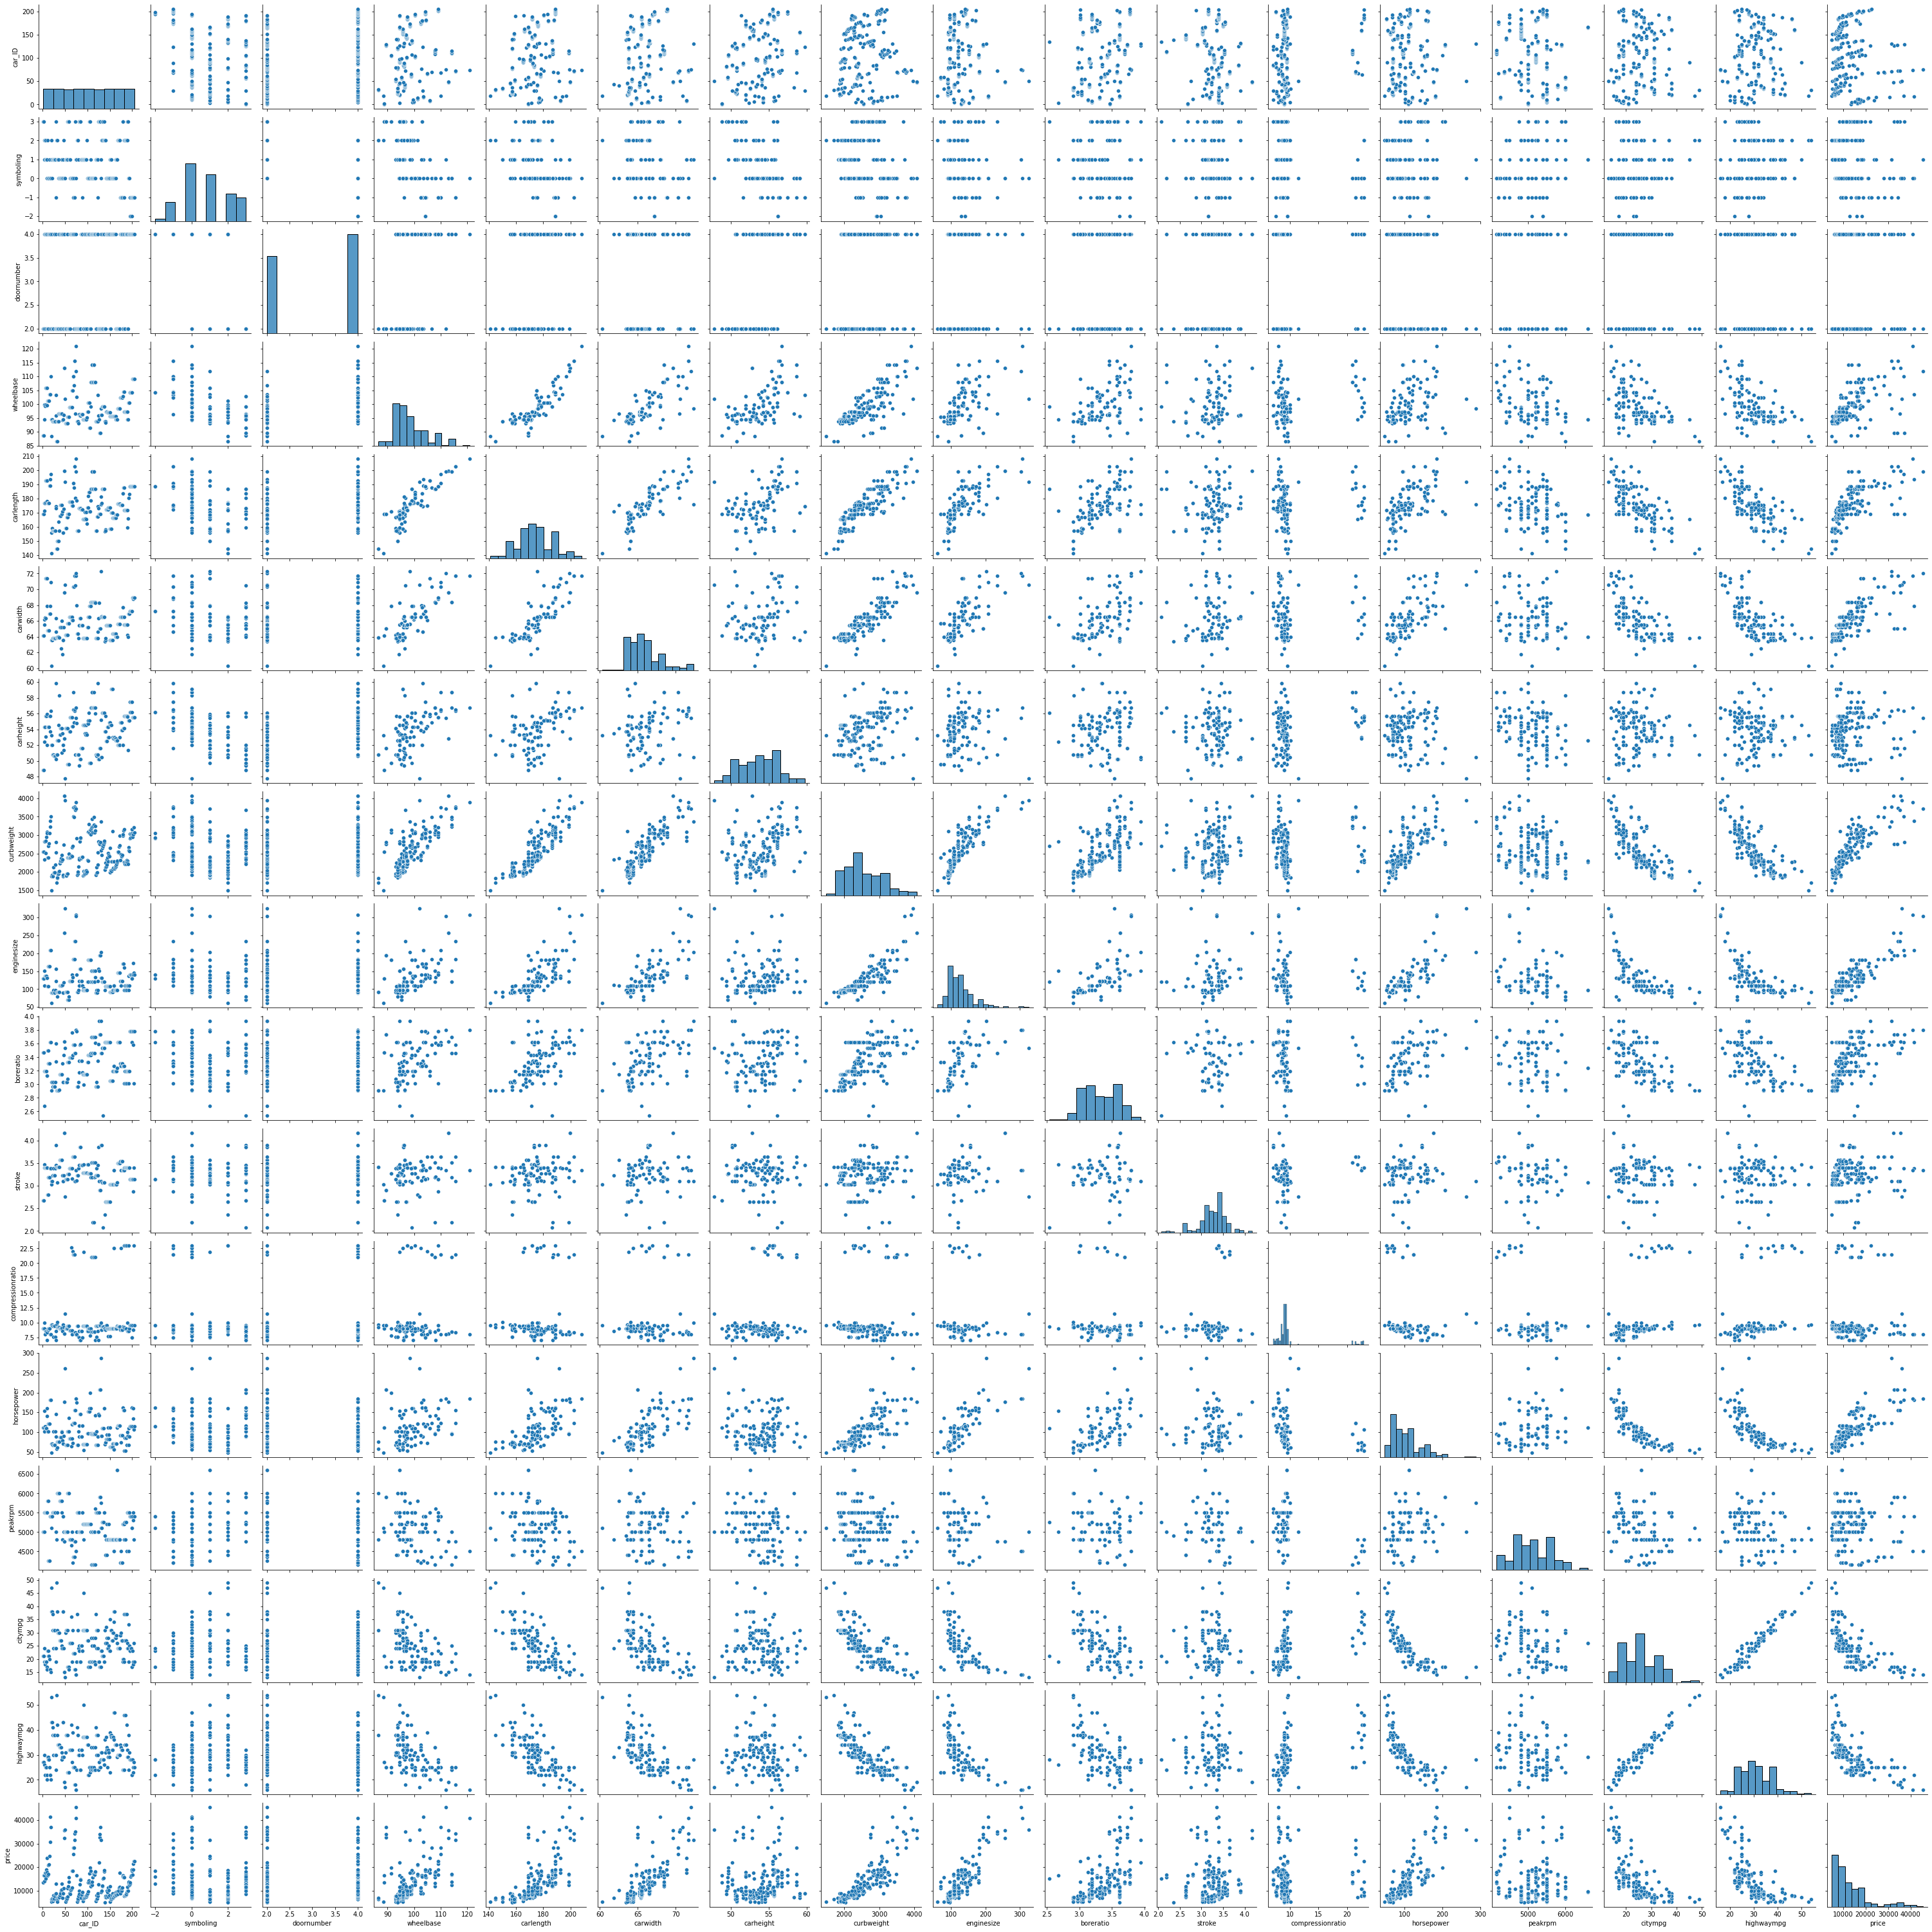

In [22]:
plt.figure(figsize = (30,30))
sns.pairplot(dataset)
plt.show()

In [23]:
numeric_columns = dataset.select_dtypes(include =['int64','float64'])
numeric_columns.head()

,car_ID,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,2,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,2,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,4,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


Корреляционная матрица - это таблица, показывающая коэффициенты корреляции между переменными. Каждая ячейка в таблице показывает корреляцию между двумя переменными. Корреляционная матрица используется для обобщения данных, в качестве входных данных для более продвинутого анализа и в качестве диагностики для расширенных анализов.

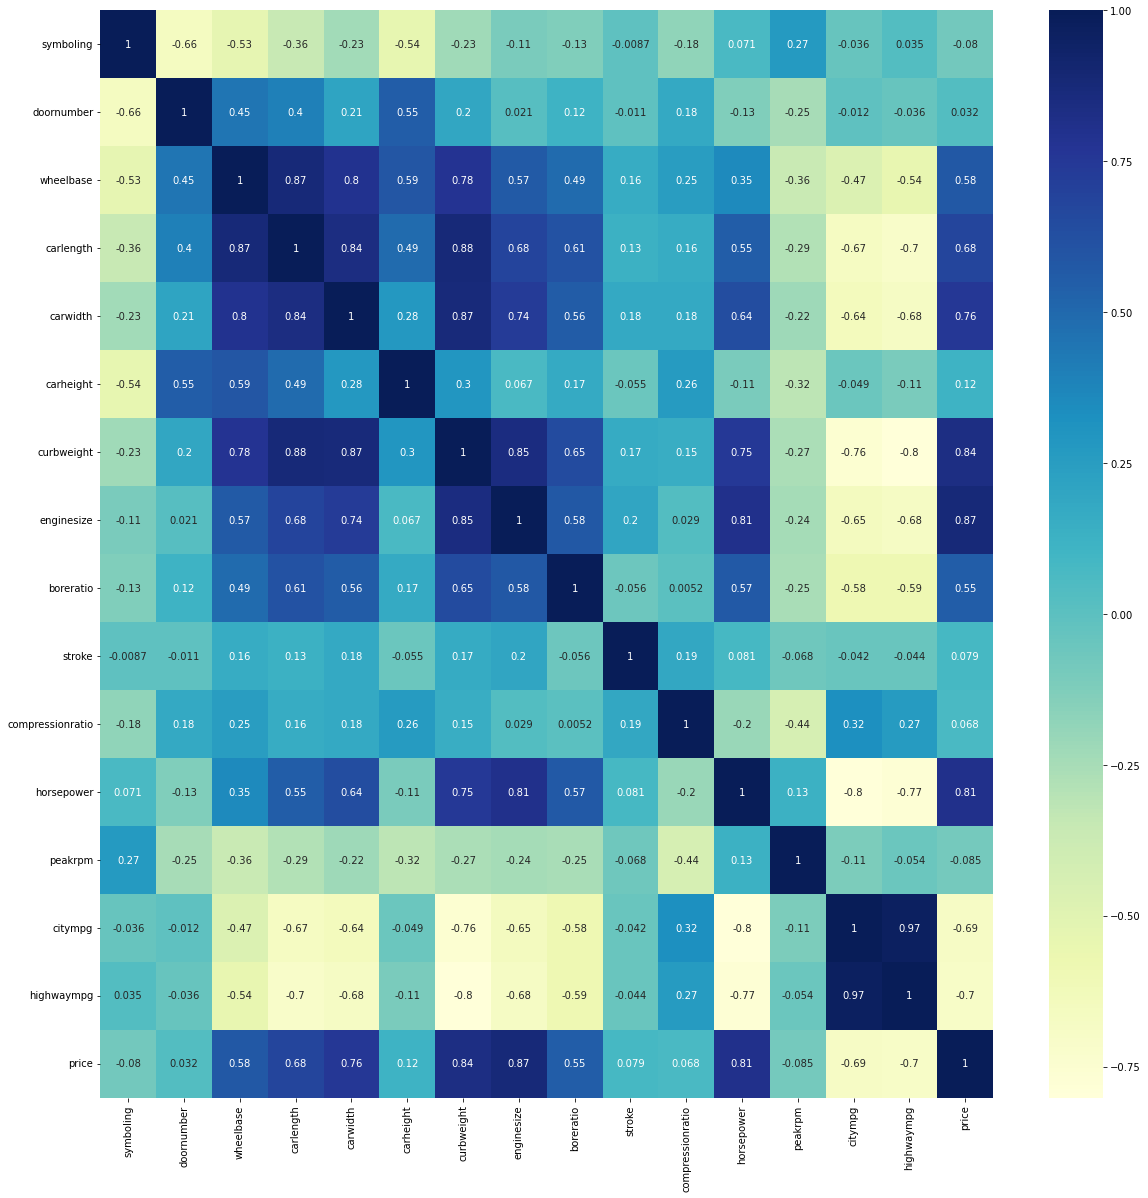

In [24]:
droppedColumn = dataset.drop(['car_ID'], axis=1)
plt.figure(figsize = (20,20))
sns.heatmap(droppedColumn.corr(), annot = True ,cmap = 'YlGnBu')
plt.show()

"Цена" сильно (положительно) коррелирует с "колесной базой", "длиной автомобиля", "шириной автомобиля", "снаряженной массой", "объемом двигателя", "лошадиной силой"

"Цена" отрицательно коррелирует с "символикой", "городским миль на галлон" и "шоссе миль на галлон". Это говорит о том, что "автомобили" с большим пробегом могут относиться к категории "экономичных автомобилей" и стоят дешевле

In [25]:
categorical_cols = dataset.select_dtypes(include=['object'])
categorical_cols.head()

,CarName,fueltype,aspiration,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,car_companies
0,alfa-romero giulia,gas,std,convertible,rwd,front,dohc,four,mpfi,alfa-romero
1,alfa-romero stelvio,gas,std,convertible,rwd,front,dohc,four,mpfi,alfa-romero
2,alfa-romero Quadrifoglio,gas,std,hatchback,rwd,front,ohcv,six,mpfi,alfa-romero
3,audi 100 ls,gas,std,sedan,fwd,front,ohc,four,mpfi,audi
4,audi 100ls,gas,std,sedan,4wd,front,ohc,five,mpfi,audi


<AxesSubplot:xlabel='fuelsystem', ylabel='price'>

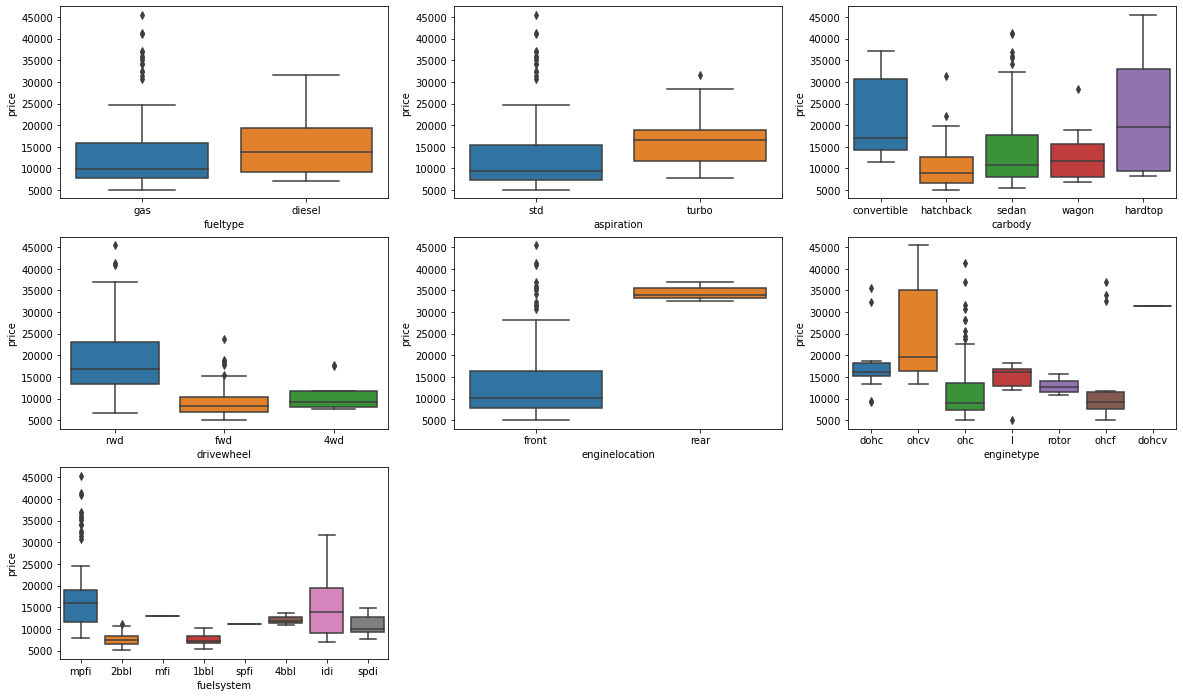

In [26]:
plt.figure(figsize=(20, 12))

plt.subplot(3, 3, 1) # 3 rows, 3 columns, 1st subplot = left
sns.boxplot(x='fueltype', y='price', data=dataset)

plt.subplot(3, 3, 2) # 3 rows, 3 columns, 2nd subplot = middle
sns.boxplot(x='aspiration', y='price', data=dataset)

plt.subplot(3, 3, 3) # 3 rows, 3 columns, 3rd subplot = right
sns.boxplot(x='carbody', y='price', data=dataset)

plt.subplot(3, 3, 4)
sns.boxplot(x='drivewheel', y='price', data=dataset)

plt.subplot(3, 3, 5)
sns.boxplot(x='enginelocation', y='price', data=dataset)

plt.subplot(3, 3, 6)
sns.boxplot(x='enginetype', y='price', data=dataset)

plt.subplot(3, 3, 7)
sns.boxplot(x='fuelsystem', y='price', data=dataset)

<AxesSubplot:xlabel='car_companies', ylabel='price'>

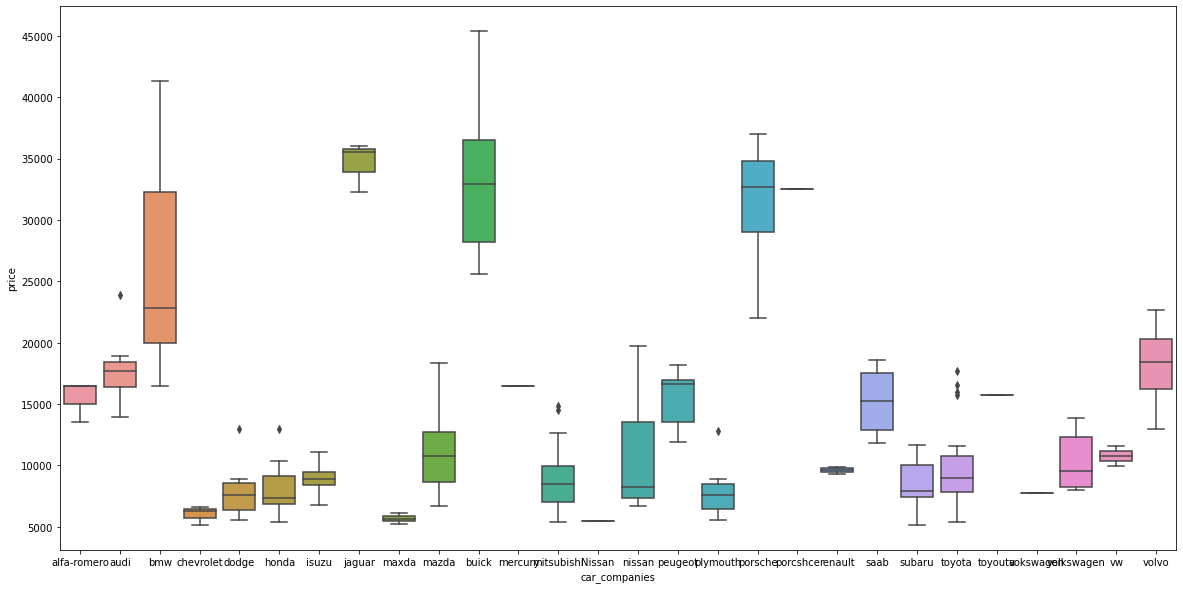

In [27]:
plt.figure(figsize=(20, 10))
sns.boxplot(x='car_companies', y='price', data=dataset)

<h3>Некоторая дедукция</h3>
Из таблицы цен видно, что бренды с самыми дорогими автомобилями в наборе данных принадлежат Bmw, Buick, Jaguar и porsche.

В то время как более дешевые автомобили принадлежат Chevrolet.

Средняя цена газовых автомобилей ниже, чем дизельных.

75-й процентиль стандартных атмосферных автомобилей имеет цену ниже, чем средняя цена автомобилей с турбонаддувом.

двух- и четырехдверные автомобили стоят почти одинаково. Однако есть некоторые отклонения в цене двухдверных автомобилей.

Почти все транспортные средства в наборе данных имеют двигатели, расположенные в передней части транспортного средства. Однако цена автомобилей с задними двигателями значительно выше, чем цена автомобилей с передними двигателями.

Средняя стоимость восьмицилиндровых автомобилей выше, чем у других категорий цилиндров.

Очевидно, что транспортные средства с многопортовой системой впрыска топлива имеют самую высокую среднюю цену. Есть также некоторые выбросы в сторону более высокой цены, имеющие системы MPFI.

Автомобили с двигателем OHV подпадают под более высокий ценовой диапазон.

<h2><center>Разработка функций</center></h2>

In [28]:
#Создание нового столбца под именем Car_companies
dataset['car_companies'] = dataset['CarName'].apply(lambda x:x.split(' ')[0])

In [29]:
dataset['car_companies'].head()

0    alfa-romero
1    alfa-romero
2    alfa-romero
3           audi
4           audi
Name: car_companies, dtype: object

In [30]:
# Удаление этих столбцов из нашего набора данных
dataset.drop(['CarName','car_ID'], axis=1)

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_companies
0,3,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,4,sedan,rwd,front,109.1,188.8,68.9,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo
201,-1,gas,turbo,4,sedan,rwd,front,109.1,188.8,68.8,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo
202,-1,gas,std,4,sedan,rwd,front,109.1,188.8,68.9,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo
203,-1,diesel,turbo,4,sedan,rwd,front,109.1,188.8,68.9,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo


<h3>Подготовка данных :</h3>
<p>Одноразовое кодирование - важный шаг для подготовки нашего набора данных к использованию в машинном обучении. Однократное кодирование превращает ваши категориальные данные в двоичное векторное представление</p>
<p>Это означает, что для каждого уникального значения в столбце создается новый столбец. Значения в этом столбце представлены в виде 1 и 0, в зависимости от того, соответствует ли значение заголовку столбца.</p>

In [31]:
#Мы используем метод get_dummies для категориальных данных :
dummies_data = pd.get_dummies(dataset[categorical_cols.columns])

In [32]:
dataset = pd.concat([dataset, dummies_data], axis=1)
dataset = dataset.drop(['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation',
                      'enginetype', 'fuelsystem', 'car_companies','CarName','cylindernumber'], axis=1)

In [33]:
dataset.head()

,car_ID,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,...,car_companies_porsche,car_companies_renault,car_companies_saab,car_companies_subaru,car_companies_toyota,car_companies_toyouta,car_companies_vokswagen,car_companies_volkswagen,car_companies_volvo,car_companies_vw
0,1,3,2,88.6,168.8,64.1,48.8,2548,130,3.47,...,0,0,0,0,0,0,0,0,0,0
1,2,3,2,88.6,168.8,64.1,48.8,2548,130,3.47,...,0,0,0,0,0,0,0,0,0,0
2,3,1,2,94.5,171.2,65.5,52.4,2823,152,2.68,...,0,0,0,0,0,0,0,0,0,0
3,4,2,4,99.8,176.6,66.2,54.3,2337,109,3.19,...,0,0,0,0,0,0,0,0,0,0
4,5,2,4,99.4,176.6,66.4,54.3,2824,136,3.19,...,0,0,0,0,0,0,0,0,0,0


<p>Разделение данных на обучающие и тестовые</p>

In [34]:
X_train, X_test = train_test_split(dataset, train_size = 0.7, test_size = 0.3, random_state = 100)

In [35]:
X_train.shape

(143, 228)

In [36]:
X_test.shape

(62, 228)

2️⃣ Изменение масштаба данных :

In [37]:
numeric_columns.columns

Index(['car_ID', 'symboling', 'doornumber', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'price'],
      dtype='object')

In [38]:
col_list = ['symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth','carheight', 'curbweight',  'enginesize', 'boreratio',
            'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']

<p>Standard Scaler - это важный метод, который в основном выполняется как этап предварительной обработки перед многими моделями машинного обучения, чтобы стандартизировать диапазон функциональных возможностей входного набора данных.</p>

In [39]:
scaler = StandardScaler()

In [40]:
X_train[col_list] = scaler.fit_transform(X_train[col_list])

In [41]:
X_train.describe()

,car_ID,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,...,car_companies_porsche,car_companies_renault,car_companies_saab,car_companies_subaru,car_companies_toyota,car_companies_toyouta,car_companies_vokswagen,car_companies_volkswagen,car_companies_volvo,car_companies_vw
count,143.000000,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.000000
mean,98.524476,5.473477e-17,9.006005e-17,1.538785e-15,2.003060e-16,-4.093074e-15,5.450186e-16,-1.894367e-16,-4.308908e-17,-1.059758e-15,...,0.020979,0.013986,0.020979,0.076923,0.132867,0.006993,0.0,0.034965,0.041958,0.013986
std,58.977655,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,...,0.143818,0.117845,0.143818,0.267406,0.340624,0.083624,0.0,0.184337,0.201198,0.117845
min,1.000000,-2.347020e+00,-1.126872e+00,-2.006930e+00,-2.574223e+00,-2.510760e+00,-2.371619e+00,-1.937401e+00,-1.566427e+00,-2.412359e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,48.500000,-6.689008e-01,-1.126872e+00,-6.771770e-01,-6.186702e-01,-8.565171e-01,-7.222984e-01,-7.711028e-01,-6.847340e-01,-9.320600e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,97.000000,1.701590e-01,8.874120e-01,-3.405307e-01,-1.128552e-01,-1.993522e-01,6.112865e-02,-2.478347e-01,-3.663447e-01,9.948427e-03,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
75%,147.500000,1.701590e-01,8.874120e-01,4.505882e-01,7.076008e-01,4.804736e-01,7.414732e-01,7.203955e-01,3.928914e-01,8.942829e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
max,205.000000,1.848278e+00,8.874120e-01,2.874442e+00,2.324616e+00,2.927846e+00,2.287711e+00,2.812547e+00,4.923816e+00,2.432256e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000


<h3>Построение модели с использованием линейной регрессии :</h3>

In [42]:
y_train = X_train.pop('price')
X_train = X_train

In [43]:
lr = LinearRegression()
model = lr.fit(X_train, y_train)

In [44]:
model.intercept_

1.2500349517461793

In [45]:
model.coef_

array([ 2.14195899e-03,  1.13399510e-01,  1.44247350e-01,  4.51234322e-01,
       -3.75089865e-01,  2.16608925e-01, -3.05062661e-02,  3.95999036e-02,
        3.93701618e-01, -2.57256349e-01, -1.94140357e-01, -8.37261253e-01,
        7.38650698e-01, -2.36467203e-02,  2.69454409e-01, -2.28550178e-01,
       -1.85458422e-02,  3.38091704e-02, -1.02369058e-01,  2.81751078e-01,
       -2.42028619e-14,  3.60474877e-02,  2.70258154e-01, -7.82707232e-15,
       -3.82715027e-01,  4.05539154e-01, -7.43923977e-01,  2.57633196e-01,
       -2.17240039e-02,  1.28785871e-14,  1.53549168e+00,  2.47526828e-01,
        1.99840144e-15,  4.75639160e-02,  6.88338275e-15, -4.23247753e-01,
       -6.61742069e-04, -1.16573418e-15,  1.13410878e-01,  4.47504671e-01,
        5.86914944e-01, -2.37902992e-01, -3.57953423e-01,  1.66706918e-01,
        2.55351296e-15, -1.43130877e-01,  8.62031085e-03, -2.49800181e-16,
       -1.03656187e-02,  2.99760217e-15, -1.56311386e-01, -7.58265524e-02,
        1.61734476e-01, -

In [46]:
X_test[col_list] = scaler.transform(X_test[col_list])
y_test = X_test.pop('price')
X_test = X_test

In [48]:
y_pred = model.predict(X_test)

In [49]:
import sklearn

<p>Среднеквадратичная ошибка показывает нам, насколько близко линия регрессии находится к набору точек. Он делает это, беря расстояния от точек до линии регрессии (эти расстояния являются “ошибками”) и возводя их в квадрат. Возведение в квадрат необходимо для удаления любых отрицательных знаков.</p>

In [50]:
mse = sklearn.metrics.mean_squared_error(y_test,y_pred)

In [51]:
mse

0.18375706483729873

<p>Оценка R2 - это очень важный показатель, который используется для оценки производительности модели машинного обучения на основе регрессии.</p>

In [52]:
from sklearn.metrics import r2_score
r_squ = r2_score(y_test,y_pred)
r_squ

0.8411854488419142

In [53]:
rmse = np.sqrt(sklearn.metrics.mean_squared_error(y_test,y_pred))
rmse

0.4286689455014192

In [54]:
from sklearn.linear_model import Ridge

In [55]:
selectColumns = X_train.select_dtypes([np.number])
numeric_features = selectColumns.columns

In [56]:
model = Ridge()  # выбранная модель

model.fit(X_train[numeric_features], y_train)  # обучение модели на обучающей выборке

y_train_pred = model.predict(X_train[numeric_features])  # использование модели для предсказания на обучающей
y_test_pred = model.predict(X_test[numeric_features])  # или на тестовой выборке

print("Test RMSE =",  sklearn.metrics.mean_squared_error(y_test, y_test_pred, squared=False))
print("Train RMSE =", sklearn.metrics.mean_squared_error(y_train, y_train_pred, squared=False))

Test RMSE = 0.2864091397096527
Train RMSE = 0.1268298400420787


In [57]:
from sklearn.model_selection import cross_val_score
# Результат для обучения наших данных в K-кратном размере с использованием MSE
cv_scores = cross_val_score(model, X_train[numeric_features], y_train, cv=4, scoring="neg_mean_squared_error")
print("Cross validation scores:\n\t", "\n\t", cv_scores)

Cross validation scores:
	 
	 [-0.2647479  -0.07203405 -0.12717772 -0.09624858]


In [58]:
# Результат для среднего значения перекрестной проверки в K-кратном
print("Mean CV MSE = %.4f" % np.mean(-cv_scores))

Mean CV MSE = 0.1401


In [59]:
#Здесь мы пытаемся спрогнозировать наши данные с помощью перекрестной проверки predict от MSE
from sklearn.model_selection import cross_val_predict
cross_test = cross_val_predict(model, X_test[numeric_features], y_test)
print(cross_test)

[-6.14451226e-01 -5.52378617e-01 -2.21233365e-01 -1.89498940e-01
 -1.73477699e-01 -1.27415843e-01  7.13685897e-01  1.06397795e+00
  4.64874624e-02  8.63987885e-01  6.28572332e-01  2.50203124e-01
  8.96490653e-01 -4.29699243e-02  4.00308195e+00 -9.32765677e-01
 -7.33295440e-01  1.46977248e-01  4.44493407e-01 -1.81501522e-02
  9.20657787e-02  1.00648219e-01  2.21684436e+00 -1.13202953e+00
 -4.27185591e-02  1.19647292e+00  2.92649902e-01  1.55362822e+00
  1.28035187e-01 -2.60980729e-01 -9.38180349e-01  1.91091232e+00
  4.14872031e-01  7.12237295e-01 -2.63154814e-03 -4.27138325e-01
  4.16034492e-01 -1.42750268e-01 -1.05910359e+00 -7.97780084e-01
  2.99261135e+00 -1.61486723e-02 -9.75664178e-01 -4.76508974e-01
 -9.39661517e-01 -6.36255884e-01 -6.77281298e-01 -1.27104919e-01
 -6.12474365e-01 -6.07901675e-01 -7.75222553e-01 -4.43816782e-03
 -9.64451363e-01 -3.51490227e-01  9.95151999e-01 -8.80836119e-01
 -3.45206000e-01 -1.01045163e-01  2.57562808e-01 -7.81512605e-01
 -4.68526060e-01  2.10179

In [60]:
# Оценка перекрестной проверки тестовых данных
cv_test = cross_val_score(model, X_test[numeric_features], y_test, cv=4, scoring="neg_mean_squared_error")
print(cv_test)

[-0.13400241 -0.1645394  -0.1557618  -0.1500076 ]


In [61]:
#Среднее значение данных теста MSE
cv_test_average = np.mean(cv_test)
print(cv_test_average)

-0.15107780355296963


In [62]:
# Нахождение перекрестной проверки для обученных данных с использованием RMSE (среднеквадратичная ошибка)
rmse_cv = cross_val_score(model, X_train[numeric_features], y_train, cv=4, scoring="neg_root_mean_squared_error")
print("Root median squared error trained data: ",rmse_cv)

Root median squared error trained data:  [-0.51453659 -0.26839159 -0.35661985 -0.31023956]


In [63]:
#Нахождение медианы для обученных данных
rmse_cv_mean = np.mean(-rmse_cv)
print(rmse_cv_mean)

0.36244689480452047


In [64]:
#Прогнозирование проверки обученных данных
rmse_cv_predict = cross_val_predict(model, X_test[numeric_features], y_test)
print(rmse_cv_predict)

[-6.14451226e-01 -5.52378617e-01 -2.21233365e-01 -1.89498940e-01
 -1.73477699e-01 -1.27415843e-01  7.13685897e-01  1.06397795e+00
  4.64874624e-02  8.63987885e-01  6.28572332e-01  2.50203124e-01
  8.96490653e-01 -4.29699243e-02  4.00308195e+00 -9.32765677e-01
 -7.33295440e-01  1.46977248e-01  4.44493407e-01 -1.81501522e-02
  9.20657787e-02  1.00648219e-01  2.21684436e+00 -1.13202953e+00
 -4.27185591e-02  1.19647292e+00  2.92649902e-01  1.55362822e+00
  1.28035187e-01 -2.60980729e-01 -9.38180349e-01  1.91091232e+00
  4.14872031e-01  7.12237295e-01 -2.63154814e-03 -4.27138325e-01
  4.16034492e-01 -1.42750268e-01 -1.05910359e+00 -7.97780084e-01
  2.99261135e+00 -1.61486723e-02 -9.75664178e-01 -4.76508974e-01
 -9.39661517e-01 -6.36255884e-01 -6.77281298e-01 -1.27104919e-01
 -6.12474365e-01 -6.07901675e-01 -7.75222553e-01 -4.43816782e-03
 -9.64451363e-01 -3.51490227e-01  9.95151999e-01 -8.80836119e-01
 -3.45206000e-01 -1.01045163e-01  2.57562808e-01 -7.81512605e-01
 -4.68526060e-01  2.10179

In [65]:
#Поиск ошибки перекрестной проверки для проверенных данных
cross_va_tested_data = cross_val_score(model, X_test[numeric_features], y_test, cv=4, scoring="neg_root_mean_squared_error")
print("Cross value score of tested data: ", cross_va_tested_data)

Cross value score of tested data:  [-0.36606339 -0.40563457 -0.3946667  -0.38730815]


In [66]:
#Нахождение среднего значения среднеквадратичной ошибки (RMSE) 
cross_va_tested_data_mean = np.mean(cross_va_tested_data)
print(cross_va_tested_data_mean)

-0.3884182016842962


In [67]:
#Выполнение той же операции для R ^ 2 (R-квадрат)
cross_va_R2 = cross_val_score(model, X_train[numeric_features], y_train, cv=4, scoring="r2")
print(cross_va_R2)

[0.73273274 0.90765737 0.90977949 0.86698358]


In [ ]:
#Finding the median for R^2 (Trained data)
r2_mean = np.mean(cross_va_R2)
print(r2_mean)

In [68]:
#Прогнозирование протестированных обученных данных R ^ 2
r2_predict = cross_val_predict(model, X_test[numeric_features], y_test, cv=4)

In [69]:
r2_median = np.median(r2_predict)
print("Median of R-squared is: ", r2_median)

Median of R-squared is:  -0.09087012478394407


<h4>Создание RFE :</h4>

In [70]:
from sklearn.feature_selection import RFE
LRmodel = LinearRegression()
rfe = RFE(LRmodel, n_features_to_select=5)
rfe = rfe.fit(X_train, y_train)

In [71]:
all_list = list(zip(X_train.columns, rfe.support_ ,rfe.ranking_))
# Let's loop over our list where we have True :
[value for index,value in enumerate(list(zip(X_train.columns,rfe.support_,rfe.ranking_))) if value[2] == True]

[('CarName_bmw x5', True, 1),
 ('CarName_jaguar xf', True, 1),
 ('CarName_jaguar xj', True, 1),
 ('enginetype_dohcv', True, 1),
 ('car_companies_bmw', True, 1)]

<h3>метод гиперпараметров :</h3>

Text(0, 0.5, 'CV score')

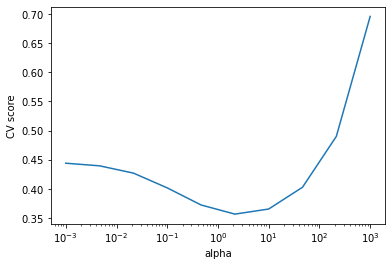

In [73]:
from sklearn.model_selection import GridSearchCV

alpha_grid = np.logspace(-3, 3, 10)
searcher = GridSearchCV(Ridge(), [{"alpha": alpha_grid}], scoring="neg_root_mean_squared_error", cv=4)
searcher.fit(X_train, y_train)

plt.plot(alpha_grid, -searcher.cv_results_["mean_test_score"])
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("CV score")

In [74]:
best_alpha = searcher.best_params_["alpha"]
print("Best alpha = %.4f" % best_alpha)

Best alpha = 2.1544


<h3>Стохастический градиентный спуск, SGD</h3>

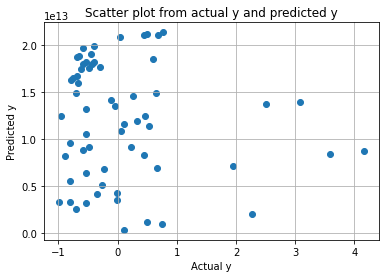

Mean Squared Error : 1.817168979587487e+26


In [75]:
from sklearn.metrics import mean_squared_error
n_iter=100
clf_ = SGDRegressor(max_iter=n_iter)
clf_.fit(X_train, y_train)
y_pred_sksgd=clf_.predict(X_test)
plt.scatter(y_test,y_pred_sksgd)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Scatter plot from actual y and predicted y')
plt.show()

print('Mean Squared Error :',mean_squared_error(y_test, y_pred_sksgd))